In [67]:
import pandas as pd
from os.path import join as PJ
import numpy as np
from collections import Counter
import json
import matplotlib.pyplot as plt

# Plot properties
minYear = 1990
maxYear = 2020

markerStyles = [
  "o-",
  "s--",
  "^-.",
  "D:",
]

# Where to save plotData files
plotDataPath = PJ("..","Data","PlotData")

dfBioMed = {
    "HuBMAP+HCA": pd.read_csv(PJ("..","Data","Publications","Biomedical_Papers_HuBMAP+HCA.csv")),
    "HGP": pd.read_csv(PJ("..","Data","Publications","Biomedical_Papers_HGP.csv"))
}

citationsByProject = {}
cumulativeCitationsByProject = {}

for projectName,df in dfBioMed.items():
    dfBioMed[projectName] = df.replace(np.nan, '', regex=True)


In [68]:
for projectName,df in dfBioMed.items():
    citationsPerYear = [int(year) for year in ";".join(dfBioMed[projectName]["Citation Years"]).split(";") if year]
    years, citationCount = zip(*sorted(Counter(citationsPerYear).items(), key=lambda d:d[0]))
    
    citationsByProject[projectName] = [years, citationCount]
    cumulativeCitationsByProject[projectName] = [years, np.cumsum(citationCount).tolist()]

with open(PJ(plotDataPath,"BioMed_CitationsData.json"),"wt") as fd:
    json.dump(citationsByProject,fd)

with open(PJ(plotDataPath,"BioMed_CumulativeCitationsData.json"),"wt") as fd:
    json.dump(cumulativeCitationsByProject,fd)

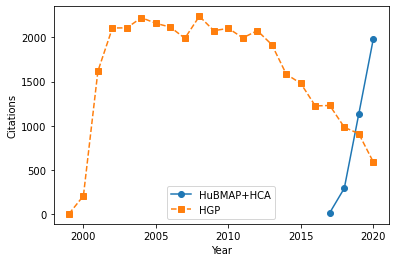

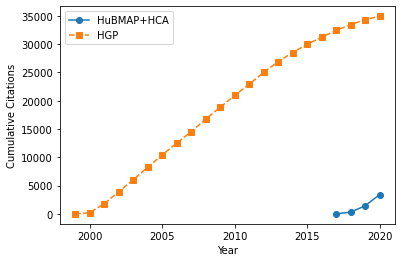

In [79]:
ax = plt.subplot(111)
for plotIndex,(projectName,(years,citations)) in enumerate(citationsByProject.items()):
    ax.plot(years,citations,markerStyles[plotIndex%len(markerStyles)],label=projectName);
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Citations")
plt.show()
ax = plt.subplot(111)
for plotIndex,(projectName,(years,cumulativeCitations)) in enumerate(cumulativeCitationsByProject.items()):
    ax.plot(years,cumulativeCitations,markerStyles[plotIndex%len(markerStyles)],label=projectName);
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Citations")
plt.show()

In [77]:
totalAffiliationsByProject = {}
for projectName,dfProject in dfBioMed.items():
    affiliations = dfProject.groupby(['Year'])["Affiliation IDs"].apply(lambda x: ';'.join([entry for entry in x if isinstance(entry,str)])).reset_index()
#     print(projectName)
    minYear = dfProject["Year"].min()
    maxYear = dfProject["Year"].max()
    years = []
    affiliationCounts = []
    for year in range(minYear,maxYear+1):
        yearAffiliations = list(affiliations[affiliations["Year"]<=year]["Affiliation IDs"])
        yearAffiliationsMerge = ";".join(yearAffiliations)
        yearAffiliationsSet = set()
        for affiliationID in yearAffiliationsMerge.split(";"):
            affiliationID.strip().lower()
            if(affiliationID):
                yearAffiliationsSet.add(affiliationID);
        years.append(year)
        affiliationCounts.append(len(yearAffiliationsSet))
#         print("%d\t%d"%(int(year),len(yearAffiliationsSet)))
    totalAffiliationsByProject[projectName] = [years,affiliationCounts]

with open(PJ(plotDataPath,"BioMed_TotalAffiliationsData.json"),"wt") as fd:
    json.dump(totalAffiliationsByProject,fd)

In [78]:
affiliationsByProject = {}
for projectName,dfProject in dfBioMed.items():
    affiliations = dfProject.groupby(['Year'])["Affiliation IDs"].apply(lambda x: ';'.join([entry for entry in x if isinstance(entry,str)])).reset_index()
#     print(projectName)
    minYear = dfProject["Year"].min()
    maxYear = dfProject["Year"].max()
    years = []
    affiliationCounts = []
    for year in range(minYear,maxYear+1):
        yearAffiliations = list(affiliations[affiliations["Year"]==year]["Affiliation IDs"])
        yearAffiliationsMerge = ";".join(yearAffiliations)
        yearAffiliationsSet = set()
        for affiliationID in yearAffiliationsMerge.split(";"):
            affiliationID.strip().lower()
            if(affiliationID):
                yearAffiliationsSet.add(affiliationID);
        years.append(year)
        affiliationCounts.append(len(yearAffiliationsSet))
#         print("%d\t%d"%(int(year),len(yearAffiliationsSet)))
    affiliationsByProject[projectName] = [years,affiliationCounts]

with open(PJ(plotDataPath,"BioMed_AffiliationsData.json"),"wt") as fd:
    json.dump(affiliationsByProject,fd)


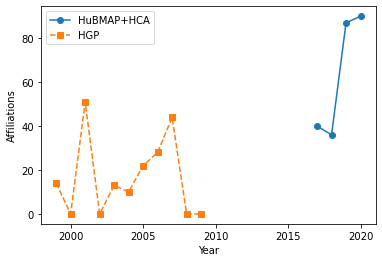

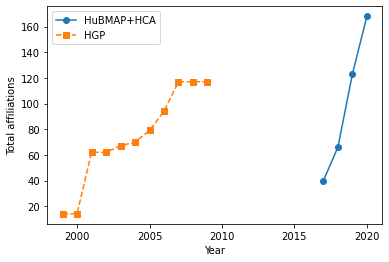

In [80]:
ax = plt.subplot(111)
for plotIndex,(projectName,(years,affiliations)) in enumerate(affiliationsByProject.items()):
    ax.plot(years,affiliations,markerStyles[plotIndex%len(markerStyles)],label=projectName);
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Affiliations")
plt.show()

ax = plt.subplot(111)
for plotIndex,(projectName,(years,affiliations)) in enumerate(totalAffiliationsByProject.items()):
    ax.plot(years,affiliations,markerStyles[plotIndex%len(markerStyles)],label=projectName);
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Total affiliations")
plt.show()

In [87]:

totalAuthorsByProject = {}
for projectName,dfProject in dfBioMed.items():
    authors = dfProject.groupby(['Year'])["Author IDs"].apply(lambda x: ';'.join([entry for entry in x if isinstance(entry,str)])).reset_index()
#     print(projectName)
    minYear = dfProject["Year"].min()
    maxYear = dfProject["Year"].max()
    years = []
    authorCounts = []
    for year in range(minYear,maxYear+1):
        yearAuthors = list(authors[authors["Year"]<=year]["Author IDs"])
        yearAuthorsMerge = ";".join(yearAuthors)
        yearAuthorsSet = set()
        for authorID in yearAuthorsMerge.split(";"):
            authorID.strip().lower()
            if(authorID):
                yearAuthorsSet.add(authorID);
        years.append(year)
        authorCounts.append(len(yearAuthorsSet))
#         print("%d\t%d"%(int(year),len(yearAuthorsSet)))
    totalAuthorsByProject[projectName] = [years,authorCounts]


with open(PJ(plotDataPath,"BioMed_TotalAuthorsData.json"),"wt") as fd:
    json.dump(totalAuthorsByProject,fd)

In [86]:

authorsByProject = {}
for projectName,dfProject in dfBioMed.items():
    authors = dfProject.groupby(['Year'])["Author IDs"].apply(lambda x: ';'.join([entry for entry in x if isinstance(entry,str)])).reset_index()
#     print(projectName)
    minYear = dfProject["Year"].min()
    maxYear = dfProject["Year"].max()
    years = []
    authorCounts = []
    for year in range(minYear,maxYear+1):
        yearAuthors = list(authors[authors["Year"]==year]["Author IDs"])
        yearAuthorsMerge = ";".join(yearAuthors)
        yearAuthorsSet = set()
        for authorID in yearAuthorsMerge.split(";"):
            authorID.strip().lower()
            if(authorID):
                yearAuthorsSet.add(authorID);
        years.append(year)
        authorCounts.append(len(yearAuthorsSet))
#         print("%d\t%d"%(int(year),len(yearAuthorsSet)))
    authorsByProject[projectName] = [years,authorCounts]
  
with open(PJ(plotDataPath,"BioMed_AuthorsData.json"),"wt") as fd:
    json.dump(authorsByProject,fd)


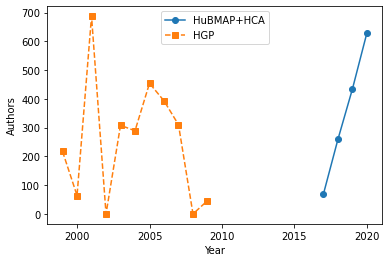

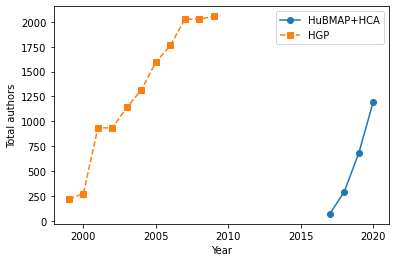

In [85]:
ax = plt.subplot(111)
for plotIndex,(projectName,(years,authors)) in enumerate(authorsByProject.items()):
    ax.plot(years,authors,markerStyles[plotIndex%len(markerStyles)],label=projectName);
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Authors")
plt.show()

ax = plt.subplot(111)
for plotIndex,(projectName,(years,authors)) in enumerate(totalAuthorsByProject.items()):
    ax.plot(years,authors,markerStyles[plotIndex%len(markerStyles)],label=projectName);
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Total authors")
plt.show()

In [89]:
from collections import Counter
publicationsByProject = {}
for projectName,dfProject in dfBioMed.items():
    years,publicationCount = list(zip(*sorted(list(Counter(dfProject['Year']).items()),key=lambda x:x[0])))
    minYear = dfProject["Year"].min()
    maxYear = dfProject["Year"].max()
    publicationsByProject[projectName] = [years,publicationCount]


with open(PJ(plotDataPath,"BioMed_PublicationsData.json"),"wt") as fd:
    json.dump(authorsByProject,fd)